In [1]:
# 배열의 크기, 반복 횟수 설정
sizes = [
    100, 250, 500, 750, 
    1000, 2500, 5000, 7500, 
    10000, 25000, 50000, 75000, 
    100000, 250000, 500000, 750000,
    1000000
]  # 배열의 크기

SIZE = sizes[6] # 5,000
THRESHODE_RANGE = 250
iterations = 5 # 각 크기별 평균을 내기 위해 반복할 횟수

thresholds = list(range(THRESHODE_RANGE)) # threshold의 범위를 0 ~ 249까지 지정
''' 
    c로 만든 두 가지 정렬(normal Quicksort, threshold used Quicksort)의 시간을 구해 파일에 추가하는 어플리케이션을
    위 두 가지 sizes, iterations을 사용하여, 반복해서 값을 구한다.
'''
for threshold in thresholds:
    for _ in range(iterations):
        !../main.out {SIZE} {threshold}

Qiucksort: elapsed time: 0 milliseconds
threshold used Qiucksort: elapsed time: 1 milliseconds
Qiucksort: elapsed time: 1 milliseconds
threshold used Qiucksort: elapsed time: 0 milliseconds
Qiucksort: elapsed time: 0 milliseconds
threshold used Qiucksort: elapsed time: 0 milliseconds
Qiucksort: elapsed time: 0 milliseconds
threshold used Qiucksort: elapsed time: 1 milliseconds
Qiucksort: elapsed time: 1 milliseconds
threshold used Qiucksort: elapsed time: 0 milliseconds
Qiucksort: elapsed time: 0 milliseconds
threshold used Qiucksort: elapsed time: 1 milliseconds
Qiucksort: elapsed time: 1 milliseconds
threshold used Qiucksort: elapsed time: 0 milliseconds
Qiucksort: elapsed time: 1 milliseconds
threshold used Qiucksort: elapsed time: 0 milliseconds
Qiucksort: elapsed time: 0 milliseconds
threshold used Qiucksort: elapsed time: 1 milliseconds
Qiucksort: elapsed time: 1 milliseconds
threshold used Qiucksort: elapsed time: 0 milliseconds
Qiucksort: elapsed time: 1 milliseconds
threshold 

In [2]:
'''
    위에서 구한 정렬 시간을 저장한 파일을 가져와서 딕셔너리에 담는다.
'''
# 시간의 합을 저장할 딕셔너리 컨테이너
threshold_used_sort_times = {}

# c 어플리케이션 main.out으로 생성, 추가된 파일 'Quicksort_threshold.txt'를 가져와 한 줄 씩 읽는다.
with open('Quicksort_threshold.txt', 'r') as f:
    # '/n'문자을 기준으로 한 줄씩 가져와 읽는다.
    for line in f:
        size, threshold, quick_sort_time, threshold_used_sort_time = map(int, line.strip().split()) 
                                                                    # .strip(): 양쪽 '\n'문자 제거 
                                                                    # .split(): ' '를 기준으로, 토큰화
        # 딕셔너리 컨테이너에 있는지 현재 크기의 시간 데이터가 있는지 확인
        # 없으면 추가                                            
        if threshold_used_sort_times.get(threshold) == None:
            threshold_used_sort_times[threshold] = threshold_used_sort_time
        # 있으면 합쳐준다.
        else:
            threshold_used_sort_times[threshold] += threshold_used_sort_time
            
# 결과 각 sizes(N)의 배열을 정렬할 때 걸리는 시간의 합을 저장하는 딕셔너리를 얻을 수 있다.
print(f"threshold_used_sort_times: {threshold_used_sort_times}")

threshold_used_sort_times: {0: 2, 1: 2, 2: 2, 3: 4, 4: 2, 5: 0, 6: 1, 7: 2, 8: 2, 9: 3, 10: 2, 11: 2, 12: 2, 13: 2, 14: 1, 15: 2, 16: 1, 17: 3, 18: 2, 19: 2, 20: 3, 21: 1, 22: 2, 23: 1, 24: 3, 25: 4, 26: 1, 27: 1, 28: 1, 29: 2, 30: 4, 31: 2, 32: 3, 33: 2, 34: 0, 35: 1, 36: 1, 37: 3, 38: 3, 39: 1, 40: 3, 41: 1, 42: 2, 43: 2, 44: 0, 45: 1, 46: 1, 47: 2, 48: 3, 49: 1, 50: 2, 51: 2, 52: 3, 53: 0, 54: 2, 55: 3, 56: 1, 57: 5, 58: 1, 59: 2, 60: 3, 61: 1, 62: 1, 63: 2, 64: 5, 65: 4, 66: 1, 67: 3, 68: 1, 69: 0, 70: 1, 71: 3, 72: 2, 73: 1, 74: 2, 75: 3, 76: 4, 77: 4, 78: 2, 79: 4, 80: 0, 81: 1, 82: 2, 83: 1, 84: 1, 85: 0, 86: 1, 87: 4, 88: 3, 89: 1, 90: 3, 91: 2, 92: 2, 93: 1, 94: 2, 95: 4, 96: 2, 97: 2, 98: 2, 99: 4, 100: 4, 101: 2, 102: 2, 103: 3, 104: 2, 105: 2, 106: 1, 107: 3, 108: 4, 109: 5, 110: 3, 111: 3, 112: 2, 113: 2, 114: 2, 115: 3, 116: 1, 117: 3, 118: 1, 119: 2, 120: 3, 121: 4, 122: 3, 123: 2, 124: 1, 125: 1, 126: 3, 127: 3, 128: 3, 129: 3, 130: 2, 131: 5, 132: 1, 133: 3, 134: 2, 13

In [3]:
# 딕셔너리에 저장된 정렬 시간의 평균을 구하는 함수
def average(times: dict, iterations: int) -> list:
    time_average_list: list = []
    for size, sum_time in times.items():
        average: float = sum_time / iterations
        time_average_list.append(average)
    return time_average_list

In [4]:
# quick_sort_average = average(quick_sort_times, iterations)
threshold_used_sort_average = average(threshold_used_sort_times, iterations)

# print(f"quick_sort_average: {quick_sort_average}")
print(f"threshold_used_sort_average: {threshold_used_sort_average}")

threshold_used_sort_average: [0.4, 0.4, 0.4, 0.8, 0.4, 0.0, 0.2, 0.4, 0.4, 0.6, 0.4, 0.4, 0.4, 0.4, 0.2, 0.4, 0.2, 0.6, 0.4, 0.4, 0.6, 0.2, 0.4, 0.2, 0.6, 0.8, 0.2, 0.2, 0.2, 0.4, 0.8, 0.4, 0.6, 0.4, 0.0, 0.2, 0.2, 0.6, 0.6, 0.2, 0.6, 0.2, 0.4, 0.4, 0.0, 0.2, 0.2, 0.4, 0.6, 0.2, 0.4, 0.4, 0.6, 0.0, 0.4, 0.6, 0.2, 1.0, 0.2, 0.4, 0.6, 0.2, 0.2, 0.4, 1.0, 0.8, 0.2, 0.6, 0.2, 0.0, 0.2, 0.6, 0.4, 0.2, 0.4, 0.6, 0.8, 0.8, 0.4, 0.8, 0.0, 0.2, 0.4, 0.2, 0.2, 0.0, 0.2, 0.8, 0.6, 0.2, 0.6, 0.4, 0.4, 0.2, 0.4, 0.8, 0.4, 0.4, 0.4, 0.8, 0.8, 0.4, 0.4, 0.6, 0.4, 0.4, 0.2, 0.6, 0.8, 1.0, 0.6, 0.6, 0.4, 0.4, 0.4, 0.6, 0.2, 0.6, 0.2, 0.4, 0.6, 0.8, 0.6, 0.4, 0.2, 0.2, 0.6, 0.6, 0.6, 0.6, 0.4, 1.0, 0.2, 0.6, 0.4, 0.8, 0.2, 0.2, 0.4, 0.8, 0.8, 0.4, 0.4, 0.4, 0.4, 0.4, 0.2, 0.6, 0.4, 0.4, 0.6, 0.6, 0.4, 0.4, 1.0, 0.6, 0.4, 0.6, 0.4, 0.6, 0.4, 0.4, 0.2, 0.8, 0.8, 0.6, 0.6, 0.4, 0.4, 0.8, 0.4, 0.2, 0.4, 0.6, 0.4, 0.8, 0.6, 0.4, 0.8, 0.4, 0.0, 0.4, 0.6, 0.6, 0.8, 0.6, 0.6, 0.4, 0.8, 0.6, 0.8, 0.4, 0.2, 0.6, 

/var/folders/bc/f500d0zj7m1cdn01yb_3k7bm0000gn/T/ipykernel_50397/2137375311.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


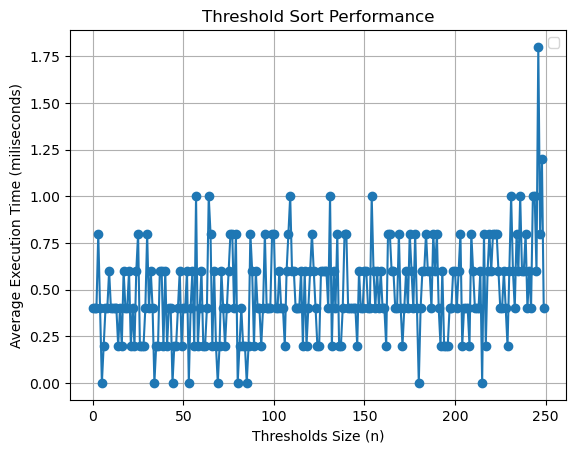

In [5]:
import matplotlib.pyplot as plt
# 데이터를 그래프로 그려주는 라이브러리 설치 필요
# 결과 그래프 그리기
'''
    그래프 정보
    배열의 크기: 5,000, 임계값: 0-249 반복횟수: 5       
'''
# x, y 각 데이터는 list 혹은 Numpy array 형태여야 한다.
thresholds = list(range(len(threshold_used_sort_average)))
plt.plot(thresholds, threshold_used_sort_average, marker='o')
plt.xlabel('Thresholds Size (n)')
plt.ylabel('Average Execution Time (miliseconds)')
plt.title('Threshold Sort Performance')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# 그래프의 범위를 좁혀 유의미한 임계값의 범위를 찾아간다.
thresholds = thresholds[:100] 
threshold_used_sort_average = threshold_used_sort_average[:100]

/var/folders/bc/f500d0zj7m1cdn01yb_3k7bm0000gn/T/ipykernel_50397/2320087541.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


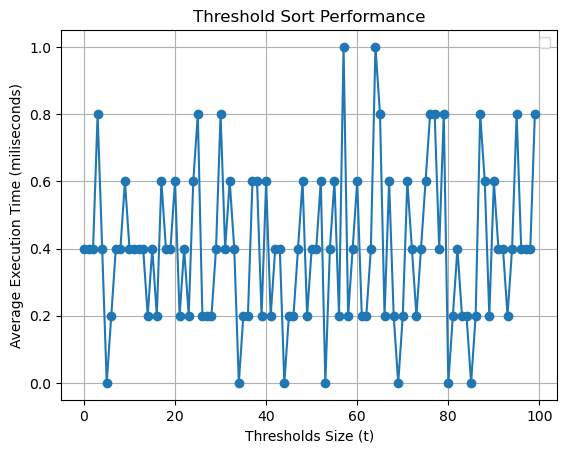

In [7]:
import matplotlib.pyplot as plt
# 데이터를 그래프로 그려주는 라이브러리 설치 필요
# 결과 그래프 그리기
'''
    그래프 정보
    배열의 크기: 5,000, 임계값: 0-(100 - 1) 반복횟수: 5        
'''
# x, y 각 데이터는 list 혹은 Numpy array 형태여야 한다.
thresholds = list(range(len(threshold_used_sort_average)))
plt.plot(thresholds, threshold_used_sort_average, marker='o')
plt.xlabel('Thresholds Size (t)')
plt.ylabel('Average Execution Time (miliseconds)')
plt.title('Threshold Sort Performance')
plt.legend()
plt.grid(True)
plt.show()